In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import numpy as np

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings("ignore")


In [3]:
FC_df = pd.read_csv("Preprocessed FC/Merged_FC.csv")
FC_df.head()
FC_df.shape

,ScanDir ID,DX,0,1,2,3,4,5,6,7,...,17945,17946,17947,17948,17949,17950,17951,17952,17953,17954
0,1018959,0,0.082767,-0.202121,-0.253291,0.143162,-0.212533,0.572503,-0.346531,0.010921,...,0.112687,0.171248,-0.073971,-0.413591,0.238855,0.300857,0.177778,0.658069,-0.052805,0.145006
1,1019436,3,0.216872,-0.055456,0.274632,0.057173,0.318357,0.334924,-0.285290,-0.093749,...,-0.466976,-0.189028,0.048556,-0.476408,0.064047,-0.008339,0.424513,0.450524,-0.022595,0.231871
2,1043241,0,-0.060757,0.218841,-0.220541,-0.009787,-0.018797,0.102055,-0.207456,-0.332605,...,-0.118490,-0.123154,-0.287799,-0.404065,0.111559,-0.233413,-0.120683,0.083335,-0.058685,0.343333
3,1266183,0,-0.063801,0.061519,-0.011792,0.016329,0.135984,0.164675,0.174189,-0.108558,...,-0.256891,-0.414658,-0.549495,0.543498,0.292311,0.164908,-0.031181,0.084472,-0.235999,-0.609832
4,1535233,0,0.022708,0.380467,0.404897,0.422225,0.546707,-0.022366,0.218834,0.274712,...,-0.238173,-0.059068,-0.020537,-0.465405,0.143333,0.194637,0.410916,0.510831,-0.106011,0.137268


(620, 17957)

In [4]:
FC_df_feature = FC_df.drop(columns = ["ScanDir ID", "DX"])
FC_df_feature

,0,1,2,3,4,5,6,7,8,9,...,17945,17946,17947,17948,17949,17950,17951,17952,17953,17954
0,0.082767,-0.202121,-0.253291,0.143162,-0.212533,0.572503,-0.346531,0.010921,0.014705,0.278126,...,0.112687,0.171248,-0.073971,-0.413591,0.238855,0.300857,0.177778,0.658069,-0.052805,0.145006
1,0.216872,-0.055456,0.274632,0.057173,0.318357,0.334924,-0.285290,-0.093749,0.051842,0.187646,...,-0.466976,-0.189028,0.048556,-0.476408,0.064047,-0.008339,0.424513,0.450524,-0.022595,0.231871
2,-0.060757,0.218841,-0.220541,-0.009787,-0.018797,0.102055,-0.207456,-0.332605,0.157679,0.080902,...,-0.118490,-0.123154,-0.287799,-0.404065,0.111559,-0.233413,-0.120683,0.083335,-0.058685,0.343333
3,-0.063801,0.061519,-0.011792,0.016329,0.135984,0.164675,0.174189,-0.108558,-0.031854,0.225915,...,-0.256891,-0.414658,-0.549495,0.543498,0.292311,0.164908,-0.031181,0.084472,-0.235999,-0.609832
4,0.022708,0.380467,0.404897,0.422225,0.546707,-0.022366,0.218834,0.274712,0.191838,0.224390,...,-0.238173,-0.059068,-0.020537,-0.465405,0.143333,0.194637,0.410916,0.510831,-0.106011,0.137268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,-0.136454,-0.065583,0.017311,0.052200,0.460014,0.306935,0.176286,-0.345477,0.164890,0.435758,...,0.206593,0.249444,-0.039177,0.034391,0.666300,0.386416,0.166788,0.555021,0.308751,0.346726
616,0.004203,-0.314136,-0.223007,0.475450,0.595427,0.529921,-0.154340,-0.193150,-0.176574,0.458033,...,0.274156,0.141414,-0.183968,-0.383677,0.533130,0.236219,0.114466,0.385278,0.143373,0.421396
617,-0.619545,-0.075170,-0.074883,0.100222,0.329930,0.071147,-0.110990,0.133600,-0.494886,-0.039970,...,0.137766,0.480185,0.059669,0.074272,0.309700,0.376793,0.156937,0.225204,0.034719,0.042565
618,-0.298730,0.156669,-0.152175,0.284072,0.307652,0.079670,-0.070846,-0.309843,-0.055744,-0.007588,...,-0.386502,0.386439,-0.201634,-0.290110,-0.528532,-0.041827,0.313892,0.230130,-0.464864,-0.326013


#### Determining the number of Principal Component numbers in PCA

The choice of number of components when applying Principal Component Aanlysis is based on finding a balance between dimentionality reduction and preserving important information. When choosing the optimal number of PC we use the explained variance analysis and plotting the cummulative variance with the number of PC. The variance increases with the number of components and choosing the number of componenets that explains about 90% of variance would be a good fit. 

<Figure size 800x500 with 0 Axes>

Text(0.5, 0, 'Number of Principal Components')

Text(0, 0.5, 'Cumulative Explained Variance')

Text(0.5, 1.0, 'PCA Explained Variance Analysis')

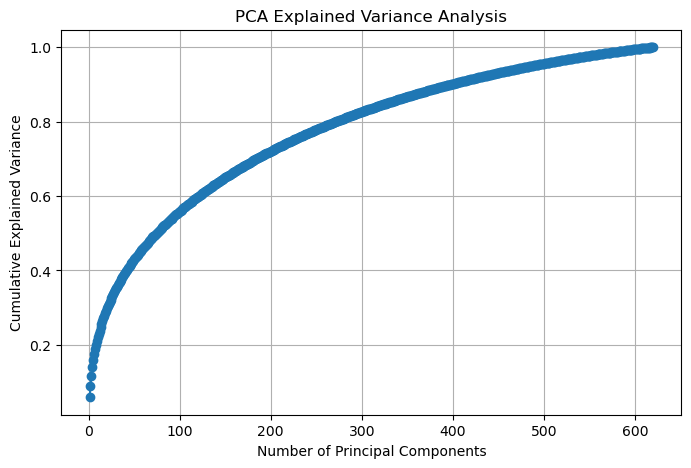

Optimal number of PCs for 95% variance: 488


In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Normalizing the FC matrix data before calculating the PCA 
scaler = StandardScaler()
normal_FC = scaler.fit_transform(FC_df_feature)

# Apply PCA without limiting components
pca = PCA().fit(normal_FC)

# Compute cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot variance vs. number of components
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance Analysis")
plt.grid()
plt.show()

Num = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of PCs for 95% variance: {Num}")

# The number of components that explains about 95% of the variance for balanced dimentionality reduced 
# flattened functional connectivity vector with preserved important information for the fMRI data is 68,
# So the 17954 columns of FC data can be reduced to 488 PC components. 

#### Applying Principal Component Analysis to Reduce Features

In [7]:
# Using the optimal number of Principal Components
pca = PCA(n_components = Num)

# Normalize


# Transforming the FC feature vectors
pca_features = pca.fit_transform(normal_FC)

subject_ids = FC_df["ScanDir ID"]

# Converting pca_features into a DataFrame
pca_columns = [f"PC{i+1}" for i in range(Num)]
pca_features_df = pd.DataFrame(pca_features, index = subject_ids, columns = pca_columns)
pca_features_df["DX"] = FC_df["DX"].values 

print(f"Original Features: {FC_df.shape[1]}")
print(f"Reduced Features (PCA): {pca_features_df.shape[1]}")
pca_features_df


Original Features: 17957
Reduced Features (PCA): 489


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC480,PC481,PC482,PC483,PC484,PC485,PC486,PC487,PC488,DX
ScanDir ID,,,,,,,,,,,,,,,,,,,,,
1018959,-19.214669,28.933982,7.124812,-4.864777,-0.918411,1.556838,-33.216430,3.703853,25.597683,1.954574,...,-0.703743,1.431570,0.585098,1.311178,2.560978,1.058323,0.699934,-2.087027,0.238786,0
1019436,-18.864300,-40.754030,-33.519231,13.250311,-0.775394,0.647756,-12.077802,-19.265826,22.666633,-2.840693,...,0.590804,-4.186011,-1.626872,-5.879905,-1.606961,-1.246036,-1.583198,0.242572,2.373836,3
1043241,7.846577,20.948205,-36.247873,20.999480,16.510235,17.077271,-2.285614,-1.724268,14.021748,-16.138031,...,0.754514,-1.506335,1.275221,-0.766122,-4.018175,2.018278,0.826163,-2.245247,1.847750,0
1266183,-8.407607,32.852001,-19.645893,13.501739,-2.173091,4.952939,-10.915426,2.953900,-3.423763,11.618529,...,-1.469141,-2.070394,-0.410683,-1.465609,0.479998,1.876242,-0.523378,1.685966,0.783129,0
1535233,-2.888877,5.990861,-8.160449,30.408660,44.460316,12.253571,-0.593780,9.542005,23.975279,15.386297,...,-1.053952,2.432530,-0.439854,0.909798,1.141703,0.357122,3.979956,1.749881,-4.279552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669389,-25.192405,23.763625,0.439288,-19.330222,-5.943365,4.132156,13.521360,-3.090829,-8.409153,3.890844,...,1.738851,0.762071,-1.074093,1.240432,1.407384,-0.274875,-2.584719,-2.105952,1.334007,0
6383713,2.900486,14.632304,-1.745459,-9.719283,-0.480417,-2.942394,22.701577,-19.565588,-28.477635,0.433893,...,4.079099,-0.999738,3.894240,0.091074,-0.708024,0.313769,3.343667,-2.401685,-0.421493,1
6477085,13.228229,-2.859517,-12.090537,7.090276,34.539183,-1.278220,28.161854,0.327277,-19.166537,-6.277526,...,2.445118,3.092194,-4.391620,1.781686,3.571165,0.911019,-3.847577,3.476473,1.880725,0


In [8]:
pca_features_df.to_csv("PCA_feature.csv", index = True)